<a href="https://colab.research.google.com/github/souptikmajumder/predict_car_prices/blob/master/Assignment(Multiple_Regression)_Machine_Learning_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:

import warnings
warnings.filterwarnings('ignore')

In [0]:
import pandas as pd
import numpy as np

df= pd.read_csv('CarPrice_Assignment.csv')

In [0]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [0]:
df.shape #26 parameters are present for analysis

(205, 26)

In [0]:
df.info() # no null parameters can be observed from the info below

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [0]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [0]:
df['Company']=list(map(lambda x:x.split(' ')[0],df['CarName'])) #separate column for car manufacturer
df['Car']=list(map(lambda x:x.split(' ')[-1],df['CarName'])) #separate column for type of car

In [0]:
df.drop('CarName',axis=1,inplace=True)    #dropping original column for manufacturer-car 

In [0]:
df.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Company,Car
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,giulia
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,stelvio
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,...,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,Quadrifoglio
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,...,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,ls
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,...,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,100ls


### Data Visualisation

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Visualising Numeric Data 

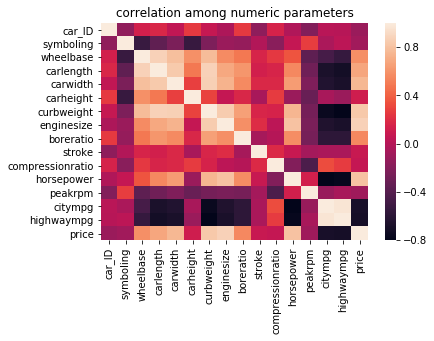

In [0]:
sns.heatmap(df.corr())
plt.title('correlation among numeric parameters')
plt.show()

#### Note :
Numeric Parameters showing high correlation with price are:<br>
- wheelbase
- carlength
- carwidth
- curbweight
- enginesize
- boreratio
- horsepower


#### Visualising Categorical(Non-numeric) Variables

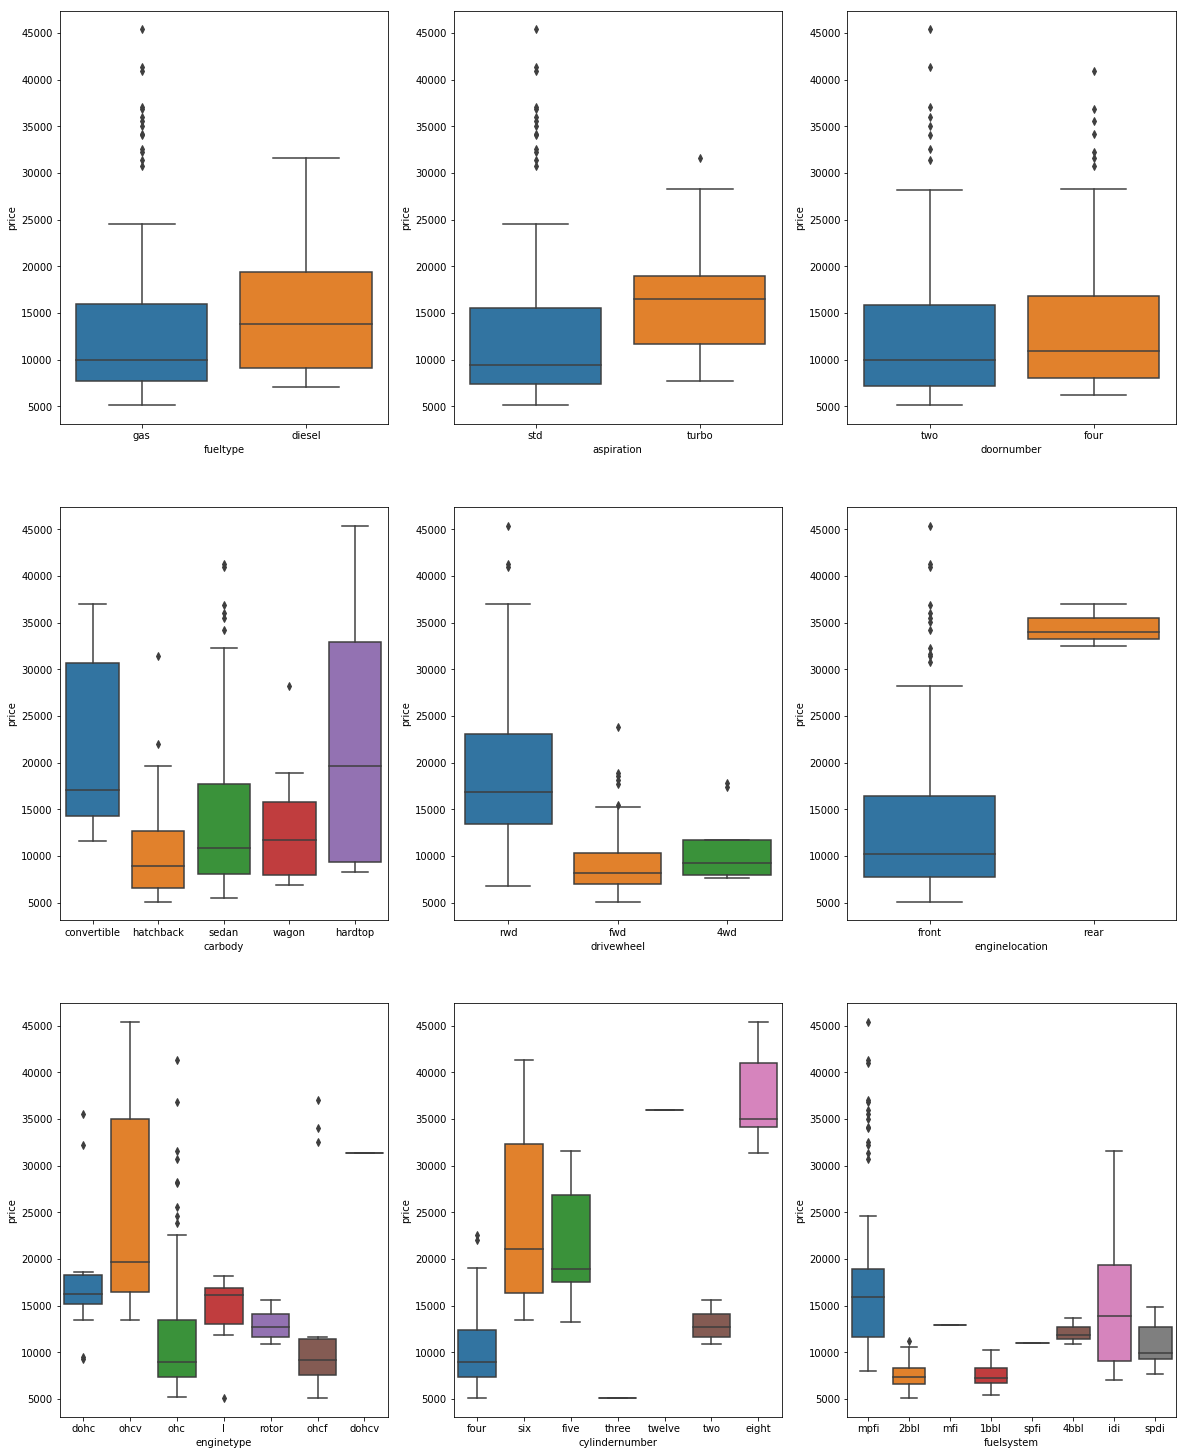

In [0]:
plt.figure(figsize=(20,35))
plt.subplot(4,3,1)
sns.boxplot(x = 'fueltype', y = 'price', data = df)
plt.subplot(4,3,2)
sns.boxplot(x = 'aspiration', y = 'price', data = df)
plt.subplot(4,3,3)
sns.boxplot(x = 'doornumber', y = 'price', data = df)
plt.subplot(4,3,4)
sns.boxplot(x = 'carbody', y = 'price', data = df)
plt.subplot(4,3,5)
sns.boxplot(x = 'drivewheel', y = 'price', data = df)
plt.subplot(4,3,6)
sns.boxplot(x = 'enginelocation', y = 'price', data = df)
plt.subplot(4,3,7)
sns.boxplot(x = 'enginetype', y = 'price', data = df)
plt.subplot(4,3,8)
sns.boxplot(x = 'cylindernumber', y = 'price', data = df)
plt.subplot(4,3,9)
sns.boxplot(x = 'fuelsystem', y = 'price', data = df)
plt.show()

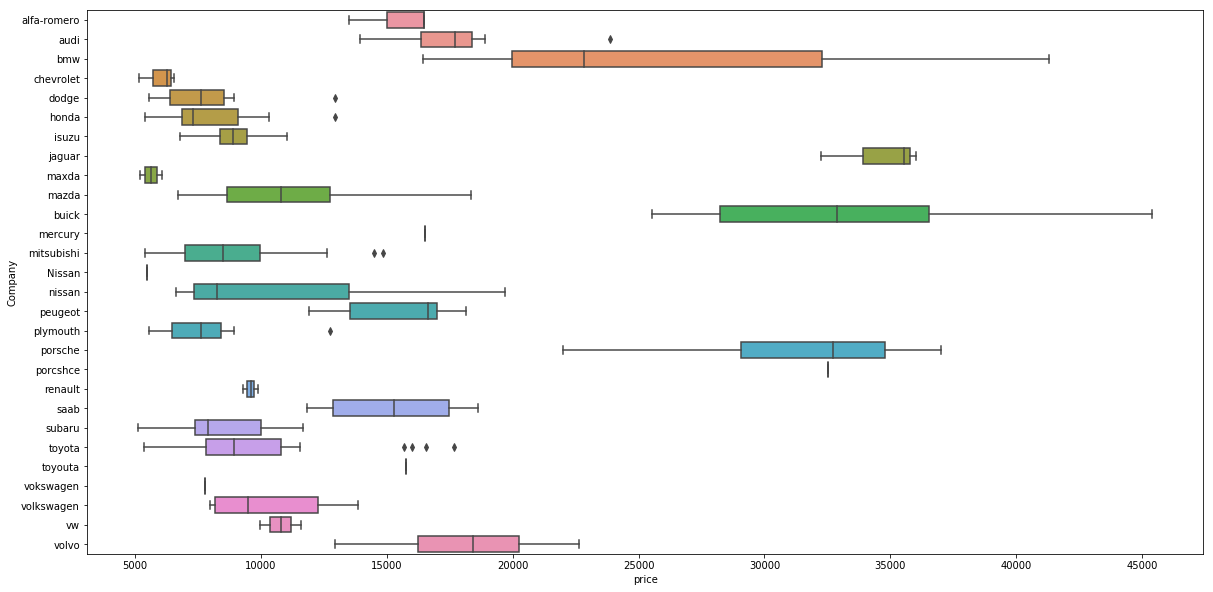

In [0]:
plt.figure(figsize=(20,10))
sns.boxplot(y = 'Company', x = 'price', data = df)
plt.show()

#### Top 3 expensive automobile manufacturers in US:
1. Jaguar
2. buick
3. porsche

In [0]:
print(set(df['fueltype']))  # unique entries for all the categorical variables
print(set(df['aspiration']))
print(set(df['doornumber']))
print(set(df['carbody']))
print(set(df['drivewheel']))
print(set(df['enginelocation']))
print(set(df['enginetype']))
print(set(df['cylindernumber']))
print(set(df['fuelsystem']))
print(set(df['Company']))

{'diesel', 'gas'}
{'std', 'turbo'}
{'four', 'two'}
{'hardtop', 'wagon', 'convertible', 'hatchback', 'sedan'}
{'rwd', 'fwd', '4wd'}
{'front', 'rear'}
{'dohc', 'ohc', 'ohcv', 'rotor', 'ohcf', 'l', 'dohcv'}
{'four', 'five', 'three', 'eight', 'twelve', 'two', 'six'}
{'spdi', '2bbl', '4bbl', 'spfi', 'mpfi', 'idi', 'mfi', '1bbl'}
{'toyota', 'mazda', 'bmw', 'volvo', 'Nissan', 'saab', 'audi', 'vokswagen', 'subaru', 'buick', 'jaguar', 'dodge', 'nissan', 'chevrolet', 'maxda', 'vw', 'honda', 'alfa-romero', 'plymouth', 'isuzu', 'mercury', 'mitsubishi', 'peugeot', 'porcshce', 'toyouta', 'porsche', 'renault', 'volkswagen'}


#### Introducing Dummy Variables for Categorical Variables


In [0]:
 # since these variables are non-ordinal categorical variables so creating dummy variables
df_fuel_type=pd.get_dummies(df['fueltype'],drop_first=True)
df_aspiration=pd.get_dummies(df['aspiration'],drop_first=True)
df_doornumber=pd.get_dummies(df['doornumber'],drop_first=True)
df_carbody=pd.get_dummies(df['carbody'],drop_first=True)
df_drivewheel=pd.get_dummies(df['drivewheel'],drop_first=True)
df_engine_loc=pd.get_dummies(df['enginelocation'],drop_first=True)
df_engine_type=pd.get_dummies(df['enginetype'],drop_first=True)
df_fuel_system=pd.get_dummies(df['fuelsystem'],drop_first=True)
df_company=pd.get_dummies(df['Company'],drop_first=True)

In [0]:
categorical_var=['fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','enginetype','fuelsystem','Company']
df.drop(categorical_var, axis = 1, inplace = True) #dropping the older columns for categorical columns

In [0]:
df = pd.concat([df, df_fuel_type,df_aspiration,df_doornumber,df_carbody,df_drivewheel,df_engine_loc,df_engine_type,df_fuel_system,df_company], axis = 1)
#concatinating the new transformed categorical variables

In [0]:
df.head()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,porsche,renault,saab,subaru,toyota,toyouta,vokswagen,volkswagen,volvo,vw
0,1,3,88.6,168.8,64.1,48.8,2548,four,130,3.47,...,0,0,0,0,0,0,0,0,0,0
1,2,3,88.6,168.8,64.1,48.8,2548,four,130,3.47,...,0,0,0,0,0,0,0,0,0,0
2,3,1,94.5,171.2,65.5,52.4,2823,six,152,2.68,...,0,0,0,0,0,0,0,0,0,0
3,4,2,99.8,176.6,66.2,54.3,2337,four,109,3.19,...,0,0,0,0,0,0,0,0,0,0
4,5,2,99.4,176.6,66.4,54.3,2824,five,136,3.19,...,0,0,0,0,0,0,0,0,0,0


In [0]:
#transforming the ordinal categorical column of cylindernumber
def value_map(x):
    if x=='two':
        return 2
    elif x=='three':
        return 3
    elif x=='four':
        return 4
    elif x=='five':
        return 4
    elif x=='six':
        return 6
    elif x=='eight':
        return 8
    elif x=='twelve':
        return 12
    

df['cylindernumber'] = list(map(lambda x:value_map(x),df['cylindernumber']))

In [0]:
df_final=df
df_final.drop(['Car','car_ID'], axis = 1, inplace = True)

In [0]:
df_final.shape # final dataframe cleaned and transformed as per requirements

(205, 66)

### Train-test Splitting of Data

In [0]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_final_train, df_final_test = train_test_split(df_final, train_size = 0.7, test_size = 0.3, random_state = 100)

In [0]:
df_final_train.shape #shape of train data

(143, 66)

In [0]:
df_final_test.shape #shape of test data

(62, 66)

### Standardisation of Data in training set

In [0]:
scale_list=['symboling','wheelbase','carlength','carwidth','carheight','curbweight','cylindernumber','enginesize','boreratio',
           'stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg']

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df_final_train[scale_list]=scaler.fit_transform(df_final_train[scale_list])

In [0]:
df_final_train.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,...,porsche,renault,saab,subaru,toyota,toyouta,vokswagen,volkswagen,volvo,vw
122,0.6,0.244828,0.426016,0.291667,0.265487,0.272692,0.2,0.139623,0.230159,0.525253,...,0,0,0,0,0,0,0,0,0,0
125,1.0,0.272414,0.452033,0.666667,0.212389,0.500388,0.2,0.339623,1.000000,0.464646,...,1,0,0,0,0,0,0,0,0,0
166,0.6,0.272414,0.448780,0.308333,0.424779,0.314973,0.2,0.139623,0.444444,0.449495,...,0,0,0,0,1,0,0,0,0,0
1,1.0,0.068966,0.450407,0.316667,0.088496,0.411171,0.2,0.260377,0.626984,0.247475,...,0,0,0,0,0,0,0,0,0,0
199,0.2,0.610345,0.775610,0.575000,0.858407,0.647401,0.2,0.260377,0.746032,0.484848,...,0,0,0,0,0,0,0,0,1,0


In [0]:
df_corr = df_final_train.corr()
df_corr.shape

(66, 66)

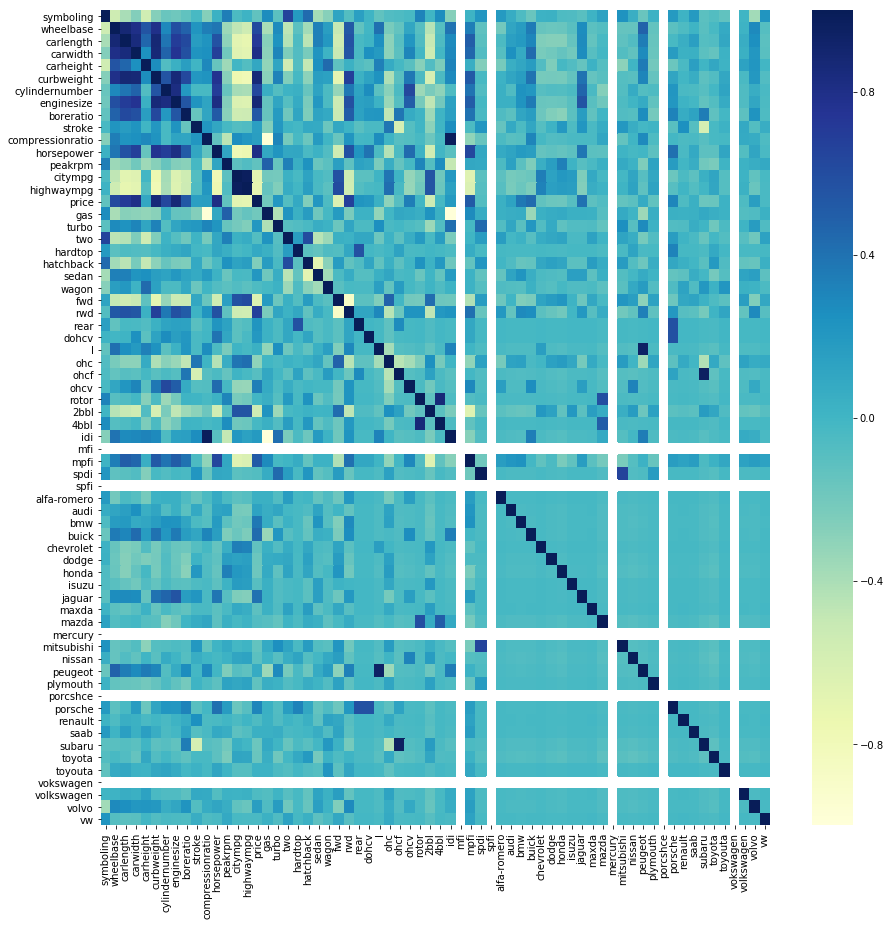

In [0]:
plt.figure(figsize=(15,15))
sns.heatmap(df_corr,cmap="YlGnBu")
plt.show()

In [0]:
df_corr['price'].sort_values(ascending=False) #list of correlation factors with price in descending order

price               1.000000
enginesize          0.867915
curbweight          0.861860
horsepower          0.806183
carwidth            0.799380
carlength           0.713749
rwd                 0.677169
cylindernumber      0.639123
wheelbase           0.622591
boreratio           0.533591
mpfi                0.519993
buick               0.437268
jaguar              0.405372
bmw                 0.371790
ohcv                0.339468
porsche             0.302801
rear                0.226217
turbo               0.206540
sedan               0.205018
dohcv               0.197875
idi                 0.191150
volvo               0.161924
compressionratio    0.160847
stroke              0.152820
audi                0.131449
carheight           0.096631
hardtop             0.089735
peugeot             0.077676
alfa-romero         0.045949
l                   0.044246
                      ...   
wagon              -0.051173
renault            -0.052989
mazda              -0.064011
spdi          

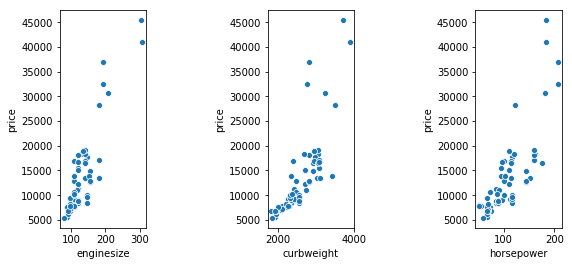

In [0]:
plt.figure(figsize=(9,4))
plt.subplot(1,5,1)
sns.scatterplot(y=df_final_test['price'],x=df_final_test['enginesize'])
plt.subplot(1,5,3)
sns.scatterplot(y=df_final_test['price'],x=df_final_test['curbweight'])
plt.subplot(1,5,5)
sns.scatterplot(y=df_final_test['price'],x=df_final_test['horsepower'])
plt.show()

Top 3 parameters which are highly correlated with price of the car are:
1. enginesize
2. curbweight
3. horsepower

#### Splitting the independent and dependent variable(outcome) from training dataset

In [0]:
y_df_final_train=df_final_train.pop('price')
X_df_final_train=df_final_train

### Feature Selection using RFE(Recursive Feature Elimination)

In [0]:
from sklearn.feature_selection import RFE 
from sklearn.linear_model import LinearRegression

lm= LinearRegression()
lm.fit(X_df_final_train,y_df_final_train)

rfe=RFE(lm,30)
rfe=rfe.fit(X_df_final_train,y_df_final_train)

In [0]:
list(zip(X_df_final_train.columns,rfe.support_,rfe.ranking_))

[('symboling', False, 32),
 ('wheelbase', True, 1),
 ('carlength', True, 1),
 ('carwidth', True, 1),
 ('carheight', True, 1),
 ('curbweight', True, 1),
 ('cylindernumber', False, 31),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', True, 1),
 ('compressionratio', True, 1),
 ('horsepower', True, 1),
 ('peakrpm', True, 1),
 ('citympg', True, 1),
 ('highwaympg', False, 10),
 ('gas', True, 1),
 ('turbo', False, 3),
 ('two', False, 29),
 ('hardtop', True, 1),
 ('hatchback', True, 1),
 ('sedan', True, 1),
 ('wagon', True, 1),
 ('fwd', False, 30),
 ('rwd', False, 15),
 ('rear', True, 1),
 ('dohcv', False, 2),
 ('l', True, 1),
 ('ohc', False, 4),
 ('ohcf', True, 1),
 ('ohcv', False, 24),
 ('rotor', True, 1),
 ('2bbl', False, 14),
 ('4bbl', True, 1),
 ('idi', True, 1),
 ('mfi', False, 34),
 ('mpfi', False, 33),
 ('spdi', False, 22),
 ('spfi', False, 25),
 ('alfa-romero', True, 1),
 ('audi', False, 19),
 ('bmw', True, 1),
 ('buick', False, 11),
 ('chevrolet', False, 7),
 ('dodge',

In [0]:
col = X_df_final_train.columns[rfe.support_]
col

Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'gas', 'hardtop', 'hatchback', 'sedan', 'wagon',
       'rear', 'l', 'ohcf', 'rotor', '4bbl', 'idi', 'alfa-romero', 'bmw',
       'mitsubishi', 'peugeot', 'porsche', 'saab', 'subaru'],
      dtype='object')

In [0]:
X_df_final_train.columns[~rfe.support_]

Index(['symboling', 'cylindernumber', 'highwaympg', 'turbo', 'two', 'fwd',
       'rwd', 'dohcv', 'ohc', 'ohcv', '2bbl', 'mfi', 'mpfi', 'spdi', 'spfi',
       'audi', 'buick', 'chevrolet', 'dodge', 'honda', 'isuzu', 'jaguar',
       'maxda', 'mazda', 'mercury', 'nissan', 'plymouth', 'porcshce',
       'renault', 'toyota', 'toyouta', 'vokswagen', 'volkswagen', 'volvo',
       'vw'],
      dtype='object')

We have selected the top `30` significant parameters using RFE to build the Model

### Statistical Analysis and Model Building using StatsModel

In [0]:
X_train_rfe=X_df_final_train[col]

In [0]:
import statsmodels.api as sm

X_train_rfe_sm=sm.add_constant(X_train_rfe)

In [0]:
lm=sm.OLS(y_df_final_train,X_train_rfe_sm).fit()

In [0]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     87.92
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           1.77e-64
Time:                        23:43:21   Log-Likelihood:                -1261.2
No. Observations:                 143   AIC:                             2580.
Df Residuals:                     114   BIC:                             2666.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1.087e+04   2613.554      4.160      0.000    5695.339    1.61e+04
wheelbase         8853.6884   2476.071      3.576      0.001    3948.610    1.38e+04
carlength        -7812.8020   3219.121     -2.427      0.017   -1.42e+04   -1435.748
carwidth          1.326e+04   2567.762      5.165      0.000    8174.625    1.83e+04
carheight        -3388.6906   1394.730     -2.430      0.017   -6151.640    -625.742
curbweight        1.576e+04   3719.830      4.237      0.000    8393.534    2.31e+04
enginesize        1.987e+04   4142.485      4.796      0.000    1.17e+04    2.81e+04
boreratio        -2506.5983   1586.668     -1.580      0.117   -5649.776     636.579
stroke           -5203.8067   1687.478     -3.084      0.003   -8546.687   -1860.926
compressionratio -2.689e+04   6309.873     -4.261      0.000   -3.94e+04   -1.44e+04
horsepower       -2985.6192   3218.237     -0.928      0.356   -9360.922    3389.684
peakrpm           3661.8209   1286.025      2.847      0.005    1114.216    6209.426
citympg           6070.1615   2489.285      2.439      0.016    1138.907     1.1e+04
gas              -5999.8021   1758.554     -3.412      0.001   -9483.485   -2516.120
hardtop          -2483.1575   1909.919     -1.300      0.196   -6266.691    1300.376
hatchback        -4102.7409   1365.095     -3.005      0.003   -6806.983   -1398.498
sedan            -2789.3458   1422.458     -1.961      0.052   -5607.224      28.532
wagon            -2819.5590   1556.493     -1.811      0.073   -5902.959     263.841
rear              8813.6651   2061.181      4.276      0.000    4730.481    1.29e+04
l                 5164.3000   2031.495      2.542      0.012    1139.923    9188.677
ohcf              3746.8147   1017.551      3.682      0.000    1731.054    5762.575
rotor             8659.8015   2231.554      3.881      0.000    4239.109    1.31e+04
4bbl             -2618.3130   2145.301     -1.220      0.225   -6868.138    1631.512
idi               1.687e+04   3753.838      4.495      0.000    9436.248    2.43e+04
alfa-romero       2426.2075   1482.309      1.637      0.104    -510.235    5362.650
bmw               8914.8445    891.136     10.004      0.000    7149.511    1.07e+04
mitsubishi       -2377.1472    751.516     -3.163      0.002   -3865.894    -888.401
peugeot           -1.11e+04   2219.453     -5.002      0.000   -1.55e+04   -6705.817
porsche           6808.9659   2048.251      3.324      0.001    2751.396    1.09e+04
saab              4740.8598   1309.145      3.621      0.000    2147.454    7334.265
subaru           -5066.8504   1275.704     -3.972      0.000   -7594.009   -2539.691
==============================================================================
Omnibus:                       34.186   Durbin-Watson:                   1.916
Prob(Omnibus):                  0.0

In [0]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
29,subaru,inf
19,ohcf,inf
17,rear,inf
12,gas,222.65
22,idi,149.92
8,compressionratio,94.65
4,curbweight,26.10
15,sedan,21.48
1,carlength,18.38
14,hatchback,17.86


In [0]:
X_train_new=X_train_rfe.drop('subaru',axis=1)

In [0]:
lm_1=sm.OLS(y_df_final_train,X_train_new).fit()
lm_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     87.92
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           1.77e-64
Time:                        23:43:21   Log-Likelihood:                -1261.2
No. Observations:                 143   AIC:                             2580.
Df Residuals:                     114   BIC:                             2666.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
wheelbase         8853.6884   2476.071      3.576      0.001    3948.610    1.38e+04
carlength        -7812.8020   3219.121     -2.427      0.017   -1.42e+04   -1435.748
carwidth          1.326e+04   2567.762      5.165      0.000    8174.625    1.83e+04
carheight        -3388.6906   1394.730     -2.430      0.017   -6151.640    -625.742
curbweight        1.576e+04   3719.830      4.237      0.000    8393.534    2.31e+04
enginesize        1.987e+04   4142.485      4.796      0.000    1.17e+04    2.81e+04
boreratio        -2506.5983   1586.668     -1.580      0.117   -5649.776     636.579
stroke           -5203.8067   1687.478     -3.084      0.003   -8546.687   -1860.926
compressionratio -2.689e+04   6309.873     -4.261      0.000   -3.94e+04   -1.44e+04
horsepower       -2985.6192   3218.237     -0.928      0.356   -9360.922    3389.684
peakrpm           3661.8209   1286.025      2.847      0.005    1114.216    6209.426
citympg           6070.1615   2489.285      2.439      0.016    1138.907     1.1e+04
gas               4872.9668   2398.970      2.031      0.045     120.625    9625.309
hardtop          -2483.1575   1909.919     -1.300      0.196   -6266.691    1300.376
hatchback        -4102.7409   1365.095     -3.005      0.003   -6806.983   -1398.498
sedan            -2789.3458   1422.458     -1.961      0.052   -5607.224      28.532
wagon            -2819.5590   1556.493     -1.811      0.073   -5902.959     263.841
rear              1.388e+04   3273.586      4.240      0.000    7395.566    2.04e+04
l                 5164.3000   2031.495      2.542      0.012    1139.923    9188.677
ohcf             -1320.0356   1037.878     -1.272      0.206   -3376.064     735.993
rotor             8659.8015   2231.554      3.881      0.000    4239.109    1.31e+04
4bbl             -2618.3130   2145.301     -1.220      0.225   -6868.138    1631.512
idi               2.775e+04   6225.063      4.457      0.000    1.54e+04    4.01e+04
alfa-romero       2426.2075   1482.309      1.637      0.104    -510.235    5362.650
bmw               8914.8445    891.136     10.004      0.000    7149.511    1.07e+04
mitsubishi       -2377.1472    751.516     -3.163      0.002   -3865.894    -888.401
peugeot           -1.11e+04   2219.453     -5.002      0.000   -1.55e+04   -6705.817
porsche           6808.9659   2048.251      3.324      0.001    2751.396    1.09e+04
saab              4740.8598   1309.145      3.621      0.000    2147.454    7334.265
==============================================================================
Omnibus:                       34.186   Durbin-Watson:                   1.916
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              121.989
Skew:                           0.806   Prob(JB):                     3.24e-27
Kurtosis:                       7.228   Cond. N

In [0]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
29,subaru,inf
19,ohcf,inf
17,rear,inf
12,gas,222.65
22,idi,149.92
8,compressionratio,94.65
4,curbweight,26.10
15,sedan,21.48
1,carlength,18.38
14,hatchback,17.86


Removing `gas` variable from the model

In [0]:
X_train_new_1=X_train_new.drop('gas',axis=1)
lm_2=sm.OLS(y_df_final_train,X_train_new_1).fit()
lm_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     337.7
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           1.74e-97
Time:                        23:43:21   Log-Likelihood:                -1263.7
No. Observations:                 143   AIC:                             2583.
Df Residuals:                     115   BIC:                             2666.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
wheelbase         7526.8436   2420.601      3.109      0.002    2732.099    1.23e+04
carlength        -7200.8026   3248.260     -2.217      0.029   -1.36e+04    -766.626
carwidth           1.38e+04   2588.769      5.329      0.000    8667.197    1.89e+04
carheight        -2549.2387   1350.082     -1.888      0.062   -5223.491     125.013
curbweight        1.821e+04   3567.443      5.103      0.000    1.11e+04    2.53e+04
enginesize        1.923e+04   4186.253      4.593      0.000    1.09e+04    2.75e+04
boreratio        -1655.4973   1551.005     -1.067      0.288   -4727.741    1416.746
stroke           -4098.9517   1618.980     -2.532      0.013   -7305.839    -892.065
compressionratio -2.491e+04   6318.213     -3.942      0.000   -3.74e+04   -1.24e+04
horsepower       -3044.0442   3261.555     -0.933      0.353   -9504.556    3416.468
peakrpm           4645.4599   1207.455      3.847      0.000    2253.724    7037.196
citympg           8820.3316   2117.090      4.166      0.000    4626.783     1.3e+04
hardtop          -1524.9492   1875.732     -0.813      0.418   -5240.414    2190.516
hatchback        -2978.3379   1264.673     -2.355      0.020   -5483.412    -473.264
sedan            -1810.0998   1356.343     -1.335      0.185   -4496.753     876.554
wagon            -2019.1326   1526.115     -1.323      0.188   -5042.073    1003.808
rear              1.409e+04   3316.098      4.250      0.000    7523.775    2.07e+04
l                 4681.6540   2044.790      2.290      0.024     631.319    8731.989
ohcf              -919.2092   1032.703     -0.890      0.375   -2964.795    1126.377
rotor             8960.2619   2256.708      3.971      0.000    4490.158    1.34e+04
4bbl             -2614.9630   2174.263     -1.203      0.232   -6921.760    1691.834
idi               2.056e+04   5191.876      3.960      0.000    1.03e+04    3.08e+04
alfa-romero       3655.3204   1371.450      2.665      0.009     938.741    6371.899
bmw               9161.7223    894.728     10.240      0.000    7389.439    1.09e+04
mitsubishi       -2189.0751    755.859     -2.896      0.005   -3686.286    -691.864
peugeot          -1.052e+04   2230.816     -4.718      0.000   -1.49e+04   -6105.139
porsche           6203.8363   2053.829      3.021      0.003    2135.595    1.03e+04
saab              4396.6050   1315.654      3.342      0.001    1790.548    7002.662
==============================================================================
Omnibus:                       22.674   Durbin-Watson:                   1.845
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.698
Skew:                           0.581   Prob(JB):                     1.09e-13
Kurtosis:                       5.944   Cond. No.                         91.3
=====================================================

In [0]:
vif = pd.DataFrame()
vif['Features'] = X_train_new_1.columns
vif['VIF'] = [variance_inflation_factor(X_train_new_1.values, i) for i in range(X_train_new_1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,compressionratio,152.59
1,carlength,138.92
4,curbweight,111.09
21,idi,101.52
2,carwidth,68.56
5,enginesize,59.53
0,wheelbase,51.22
14,sedan,36.24
9,horsepower,34.76
7,stroke,33.81


In [0]:
X_train_new_2=X_train_new_1.drop(['sedan'],axis=1) #dropping sedan as it has high P value and higher VIF

In [0]:
lm_3=sm.OLS(y_df_final_train,X_train_new_2).fit()
lm_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     347.8
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           2.23e-98
Time:                        23:43:22   Log-Likelihood:                -1264.8
No. Observations:                 143   AIC:                             2584.
Df Residuals:                     116   BIC:                             2664.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
wheelbase         7087.6264   2406.182      2.946      0.004    2321.879    1.19e+04
carlength        -8693.8192   3059.773     -2.841      0.005   -1.48e+04   -2633.553
carwidth          1.469e+04   2508.410      5.857      0.000    9723.739    1.97e+04
carheight        -2898.3927   1328.941     -2.181      0.031   -5530.527    -266.259
curbweight        1.839e+04   3576.745      5.142      0.000    1.13e+04    2.55e+04
enginesize        2.006e+04   4153.517      4.830      0.000    1.18e+04    2.83e+04
boreratio        -1271.7845   1529.244     -0.832      0.407   -4300.646    1757.077
stroke           -4931.0676   1499.115     -3.289      0.001   -7900.254   -1961.881
compressionratio -2.636e+04   6244.263     -4.222      0.000   -3.87e+04    -1.4e+04
horsepower       -4483.5929   3088.361     -1.452      0.149   -1.06e+04    1633.295
peakrpm           4534.4482   1208.635      3.752      0.000    2140.595    6928.301
citympg           7686.5878   1945.682      3.951      0.000    3832.920    1.15e+04
hardtop            150.8775   1398.066      0.108      0.914   -2618.168    2919.923
hatchback        -1396.7957    443.053     -3.153      0.002   -2274.318    -519.273
wagon             -154.9448    616.702     -0.251      0.802   -1376.400    1066.511
rear              1.467e+04   3298.839      4.447      0.000    8135.574    2.12e+04
l                 4918.4538   2043.923      2.406      0.018     870.207    8966.701
ohcf             -1494.4034    941.616     -1.587      0.115   -3359.393     370.586
rotor             8875.8924   2263.403      3.921      0.000    4392.937    1.34e+04
4bbl             -2747.5547   2179.291     -1.261      0.210   -7063.916    1568.807
idi               2.191e+04   5109.476      4.288      0.000    1.18e+04     3.2e+04
alfa-romero       4378.6884   1264.026      3.464      0.001    1875.126    6882.251
bmw               9073.7968    895.297     10.135      0.000    7300.548    1.08e+04
mitsubishi       -2348.5313    748.864     -3.136      0.002   -3831.750    -865.313
peugeot          -1.087e+04   2223.035     -4.890      0.000   -1.53e+04   -6468.199
porsche           5864.9787   2044.923      2.868      0.005    1814.751    9915.206
saab              4535.5425   1315.936      3.447      0.001    1929.166    7141.919
==============================================================================
Omnibus:                       23.861   Durbin-Watson:                   1.817
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               64.128
Skew:                           0.610   Prob(JB):                     1.19e-14
Kurtosis:                       6.045   Cond. No.                         85.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance m

In [0]:
vif = pd.DataFrame()
vif['Features'] = X_train_new_2.columns
vif['VIF'] = [variance_inflation_factor(X_train_new_2.values, i) for i in range(X_train_new_2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,compressionratio,148.04
1,carlength,122.44
4,curbweight,110.92
20,idi,97.67
2,carwidth,63.94
5,enginesize,58.21
0,wheelbase,50.27
9,horsepower,30.96
7,stroke,28.80
6,boreratio,27.96


Dropping `wagon` from dataset as it has p value with `0.111` and VIF ~ `10.8`

In [0]:
X_train_new_3=X_train_new_2.drop(['wagon'],axis=1)

In [0]:
lm_4=sm.OLS(y_df_final_train,X_train_new_3).fit()
lm_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     364.1
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           1.19e-99
Time:                        23:43:22   Log-Likelihood:                -1264.9
No. Observations:                 143   AIC:                             2582.
Df Residuals:                     117   BIC:                             2659.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
wheelbase         7209.1124   2347.642      3.071      0.003    2559.731    1.19e+04
carlength        -8815.4037   3009.142     -2.930      0.004   -1.48e+04   -2855.956
carwidth          1.486e+04   2412.141      6.159      0.000    1.01e+04    1.96e+04
carheight        -2999.2406   1261.792     -2.377      0.019   -5498.153    -500.328
curbweight        1.811e+04   3388.970      5.345      0.000    1.14e+04    2.48e+04
enginesize        2.022e+04   4088.251      4.946      0.000    1.21e+04    2.83e+04
boreratio        -1205.8561   1500.519     -0.804      0.423   -4177.556    1765.843
stroke           -4907.9562   1490.288     -3.293      0.001   -7859.393   -1956.519
compressionratio -2.646e+04   6207.267     -4.263      0.000   -3.88e+04   -1.42e+04
horsepower       -4478.9325   3075.916     -1.456      0.148   -1.06e+04    1612.757
peakrpm           4538.6889   1203.668      3.771      0.000    2154.887    6922.491
citympg           7696.3918   1937.486      3.972      0.000    3859.301    1.15e+04
hardtop            159.7496   1392.013      0.115      0.909   -2597.059    2916.558
hatchback        -1391.4911    440.774     -3.157      0.002   -2264.422    -518.560
rear              1.478e+04   3255.868      4.540      0.000    8332.524    2.12e+04
l                 4936.2447   2034.501      2.426      0.017     907.022    8965.467
ohcf             -1536.0151    923.218     -1.664      0.099   -3364.399     292.369
rotor             8891.2269   2253.503      3.946      0.000    4428.282    1.34e+04
4bbl             -2753.8615   2170.405     -1.269      0.207   -7052.234    1544.511
idi               2.201e+04   5073.555      4.338      0.000     1.2e+04    3.21e+04
alfa-romero       4426.5430   1244.580      3.557      0.001    1961.718    6891.368
bmw               9112.0888    878.690     10.370      0.000    7371.888    1.09e+04
mitsubishi       -2359.8036    744.520     -3.170      0.002   -3834.286    -885.322
peugeot           -1.09e+04   2210.624     -4.932      0.000   -1.53e+04   -6524.540
porsche           5799.3129   2020.016      2.871      0.005    1798.778    9799.848
saab              4613.1182   1274.068      3.621      0.000    2089.892    7136.344
==============================================================================
Omnibus:                       23.853   Durbin-Watson:                   1.816
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               63.418
Skew:                           0.614   Prob(JB):                     1.69e-14
Kurtosis:                       6.022   Cond. No.                         85.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [0]:
vif = pd.DataFrame()
vif['Features'] = X_train_new_3.columns
vif['VIF'] = [variance_inflation_factor(X_train_new_3.values, i) for i in range(X_train_new_3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,compressionratio,147.47
1,carlength,119.38
4,curbweight,100.38
19,idi,97.08
2,carwidth,59.60
5,enginesize,56.85
0,wheelbase,48.24
9,horsepower,30.96
7,stroke,28.69
6,boreratio,27.14


removing `hardtop` from the dataset

In [0]:
X_train_new_4=X_train_new_3.drop(['hardtop'],axis=1)

In [0]:

lm_4=sm.OLS(y_df_final_train,X_train_new_4).fit()
lm_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     381.8
Date:                Mon, 15 Jul 2019   Prob (F-statistic):          6.06e-101
Time:                        23:43:22   Log-Likelihood:                -1264.9
No. Observations:                 143   AIC:                             2580.
Df Residuals:                     118   BIC:                             2654.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
wheelbase         7226.5474   2332.904      3.098      0.002    2606.762    1.18e+04
carlength        -8859.9201   2971.532     -2.982      0.003   -1.47e+04   -2975.479
carwidth          1.485e+04   2401.833      6.184      0.000    1.01e+04    1.96e+04
carheight        -3011.7726   1251.790     -2.406      0.018   -5490.658    -532.887
curbweight        1.813e+04   3372.342      5.376      0.000    1.15e+04    2.48e+04
enginesize        2.016e+04   4039.416      4.991      0.000    1.22e+04    2.82e+04
boreratio        -1171.9727   1465.020     -0.800      0.425   -4073.111    1729.166
stroke           -4880.9356   1465.405     -3.331      0.001   -7782.836   -1979.035
compressionratio -2.635e+04   6100.741     -4.318      0.000   -3.84e+04   -1.43e+04
horsepower       -4450.6317   3053.167     -1.458      0.148   -1.05e+04    1595.470
peakrpm           4522.5273   1190.393      3.799      0.000    2165.226    6879.829
citympg           7684.5510   1926.630      3.989      0.000    3869.299    1.15e+04
hatchback        -1400.1286    432.481     -3.237      0.002   -2256.559    -543.698
rear              1.496e+04   2835.993      5.276      0.000    9345.652    2.06e+04
l                 4931.6835   2025.589      2.435      0.016     920.465    8942.902
ohcf             -1546.3896    914.931     -1.690      0.094   -3358.202     265.423
rotor             8870.5620   2236.885      3.966      0.000    4440.921    1.33e+04
4bbl             -2751.0516   2161.173     -1.273      0.206   -7030.762    1528.658
idi               2.191e+04   4975.455      4.404      0.000    1.21e+04    3.18e+04
alfa-romero       4421.7538   1238.668      3.570      0.001    1968.854    6874.653
bmw               9109.3141    874.677     10.414      0.000    7377.215    1.08e+04
mitsubishi       -2363.4238    740.734     -3.191      0.002   -3830.279    -896.569
peugeot           -1.09e+04   2201.033     -4.951      0.000   -1.53e+04   -6539.543
porsche           5772.4256   1997.976      2.889      0.005    1815.890    9728.961
saab              4608.4798   1268.091      3.634      0.000    2097.314    7119.646
==============================================================================
Omnibus:                       23.912   Durbin-Watson:                   1.819
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               63.749
Skew:                           0.615   Prob(JB):                     1.44e-14
Kurtosis:                       6.031   Cond. No.                         83.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [0]:
vif = pd.DataFrame()
vif['Features'] = X_train_new_4.columns
vif['VIF'] = [variance_inflation_factor(X_train_new_4.values, i) for i in range(X_train_new_4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,compressionratio,143.66
1,carlength,117.39
4,curbweight,100.24
18,idi,94.15
2,carwidth,59.59
5,enginesize,55.97
0,wheelbase,48.04
9,horsepower,30.76
7,stroke,27.97
6,boreratio,26.09


In [0]:
X_train_new_5=X_train_new_4.drop(['boreratio'],axis=1)

In [0]:
lm_5=sm.OLS(y_df_final_train,X_train_new_5).fit()
lm_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     398.9
Date:                Mon, 15 Jul 2019   Prob (F-statistic):          4.12e-102
Time:                        23:43:22   Log-Likelihood:                -1265.2
No. Observations:                 143   AIC:                             2578.
Df Residuals:                     119   BIC:                             2650.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
wheelbase         7504.3572   2303.419      3.258      0.001    2943.357    1.21e+04
carlength        -9851.7259   2696.446     -3.654      0.000   -1.52e+04   -4512.493
carwidth          1.507e+04   2382.196      6.328      0.000    1.04e+04    1.98e+04
carheight        -3039.9184   1249.401     -2.433      0.016   -5513.857    -565.979
curbweight         1.81e+04   3367.020      5.375      0.000    1.14e+04    2.48e+04
enginesize         1.94e+04   3920.756      4.949      0.000    1.16e+04    2.72e+04
stroke           -4911.5950   1462.686     -3.358      0.001   -7807.859   -2015.331
compressionratio -2.567e+04   6032.082     -4.255      0.000   -3.76e+04   -1.37e+04
horsepower       -4231.3603   3036.235     -1.394      0.166   -1.02e+04    1780.687
peakrpm           4496.0873   1188.132      3.784      0.000    2143.467    6848.708
citympg           7438.9674   1899.135      3.917      0.000    3678.490    1.12e+04
hatchback        -1439.3596    429.041     -3.355      0.001   -2288.904    -589.815
rear              1.571e+04   2671.049      5.883      0.000    1.04e+04     2.1e+04
l                 4902.1355   2022.186      2.424      0.017     898.004    8906.266
ohcf             -1983.9932    732.281     -2.709      0.008   -3433.982    -534.004
rotor             8518.3624   2189.810      3.890      0.000    4182.320    1.29e+04
4bbl             -2743.1756   2157.878     -1.271      0.206   -7015.990    1529.639
idi               2.138e+04   4923.809      4.342      0.000    1.16e+04    3.11e+04
alfa-romero       4440.4958   1236.571      3.591      0.000    1991.961    6889.031
bmw               9087.9734    872.947     10.411      0.000    7359.452    1.08e+04
mitsubishi       -2407.0971    737.601     -3.263      0.001   -3867.621    -946.573
peugeot          -1.104e+04   2190.464     -5.040      0.000   -1.54e+04   -6703.621
porsche           5015.1565   1756.829      2.855      0.005    1536.460    8493.853
saab              4439.4190   1248.464      3.556      0.001    1967.335    6911.503
==============================================================================
Omnibus:                       23.538   Durbin-Watson:                   1.816
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               64.915
Skew:                           0.590   Prob(JB):                     8.01e-15
Kurtosis:                       6.083   Cond. No.                         76.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [0]:
vif = pd.DataFrame()
vif['Features'] = X_train_new_5.columns
vif['VIF'] = [variance_inflation_factor(X_train_new_5.values, i) for i in range(X_train_new_5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,compressionratio,140.87
4,curbweight,100.23
1,carlength,96.96
17,idi,92.48
2,carwidth,58.80
5,enginesize,52.89
0,wheelbase,46.98
8,horsepower,30.51
6,stroke,27.95
10,citympg,23.14


In [0]:
X_train_new_6=X_train_new_5.drop(['4bbl'],axis=1)
lm_6=sm.OLS(y_df_final_train,X_train_new_6).fit()
lm_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     414.1
Date:                Mon, 15 Jul 2019   Prob (F-statistic):          4.45e-103
Time:                        23:43:22   Log-Likelihood:                -1266.2
No. Observations:                 143   AIC:                             2578.
Df Residuals:                     120   BIC:                             2647.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
wheelbase         7572.0338   2308.708      3.280      0.001    3000.953    1.21e+04
carlength        -9925.6015   2702.731     -3.672      0.000   -1.53e+04   -4574.383
carwidth          1.497e+04   2386.901      6.272      0.000    1.02e+04    1.97e+04
carheight        -2996.0852   1252.127     -2.393      0.018   -5475.209    -516.961
curbweight        1.802e+04   3375.147      5.340      0.000    1.13e+04    2.47e+04
enginesize        1.911e+04   3924.131      4.871      0.000    1.13e+04    2.69e+04
stroke           -4885.2646   1466.288     -3.332      0.001   -7788.413   -1982.116
compressionratio -2.543e+04   6044.745     -4.207      0.000   -3.74e+04   -1.35e+04
horsepower       -3655.6598   3009.968     -1.215      0.227   -9615.186    2303.867
peakrpm           4402.0116   1188.865      3.703      0.000    2048.141    6755.882
citympg           7468.9740   1903.857      3.923      0.000    3699.470    1.12e+04
hatchback        -1452.9376    430.008     -3.379      0.001   -2304.323    -601.552
rear              1.572e+04   2677.896      5.869      0.000    1.04e+04     2.1e+04
l                 4851.0741   2026.970      2.393      0.018     837.814    8864.334
ohcf             -1989.5503    734.145     -2.710      0.008   -3443.106    -535.994
rotor             6437.8007   1458.607      4.414      0.000    3549.861    9325.740
idi               2.121e+04   4934.674      4.299      0.000    1.14e+04     3.1e+04
alfa-romero       4416.8902   1239.602      3.563      0.001    1962.565    6871.215
bmw               9061.3606    874.933     10.357      0.000    7329.055    1.08e+04
mitsubishi       -2401.8410    739.480     -3.248      0.002   -3865.961    -937.721
peugeot          -1.097e+04   2195.448     -4.999      0.000   -1.53e+04   -6627.374
porsche           4890.6994   1758.596      2.781      0.006    1408.802    8372.597
saab              4399.7184   1251.273      3.516      0.001    1922.285    6877.152
==============================================================================
Omnibus:                       22.700   Durbin-Watson:                   1.844
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.188
Skew:                           0.579   Prob(JB):                     8.52e-14
Kurtosis:                       5.960   Cond. No.                         76.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [0]:
vif = pd.DataFrame()
vif['Features'] = X_train_new_6.columns
vif['VIF'] = [variance_inflation_factor(X_train_new_6.values, i) for i in range(X_train_new_6.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,compressionratio,140.74
4,curbweight,100.20
1,carlength,96.91
16,idi,92.42
2,carwidth,58.73
5,enginesize,52.71
0,wheelbase,46.95
8,horsepower,29.83
6,stroke,27.95
10,citympg,23.14


In [0]:
X_train_new_7=X_train_new_6.drop(['horsepower'],axis=1)
lm_7=sm.OLS(y_df_final_train,X_train_new_7).fit()
lm_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     431.1
Date:                Mon, 15 Jul 2019   Prob (F-statistic):          4.39e-104
Time:                        23:43:23   Log-Likelihood:                -1267.1
No. Observations:                 143   AIC:                             2578.
Df Residuals:                     121   BIC:                             2643.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
wheelbase         8079.1123   2275.094      3.551      0.001    3574.963    1.26e+04
carlength        -1.001e+04   2707.136     -3.698      0.000   -1.54e+04   -4650.520
carwidth          1.462e+04   2374.547      6.159      0.000    9923.933    1.93e+04
carheight        -2844.3499   1248.322     -2.279      0.024   -5315.732    -372.968
curbweight        1.704e+04   3282.046      5.191      0.000    1.05e+04    2.35e+04
enginesize        1.704e+04   3540.758      4.813      0.000       1e+04    2.41e+04
stroke           -4729.4026   1463.526     -3.232      0.002   -7626.838   -1831.967
compressionratio -2.433e+04   5987.955     -4.063      0.000   -3.62e+04   -1.25e+04
peakrpm           3744.1344   1060.369      3.531      0.001    1644.854    5843.415
citympg           7742.2172   1894.224      4.087      0.000    3992.100    1.15e+04
hatchback        -1534.8590    425.517     -3.607      0.000   -2377.283    -692.435
rear               1.59e+04   2678.794      5.936      0.000    1.06e+04    2.12e+04
l                 4587.7053   2019.290      2.272      0.025     589.989    8585.422
ohcf             -2052.6884    733.738     -2.798      0.006   -3505.317    -600.060
rotor             6263.3131   1454.361      4.307      0.000    3384.023    9142.603
idi               2.045e+04   4903.621      4.170      0.000    1.07e+04    3.02e+04
alfa-romero       4343.0842   1240.539      3.501      0.001    1887.110    6799.059
bmw               8923.4363    869.233     10.266      0.000    7202.561    1.06e+04
mitsubishi       -2395.7493    740.913     -3.234      0.002   -3862.583    -928.916
peugeot          -1.065e+04   2183.543     -4.878      0.000    -1.5e+04   -6328.198
porsche           4155.8729   1654.477      2.512      0.013     880.398    7431.347
saab              4135.2251   1234.592      3.349      0.001    1691.024    6579.427
==============================================================================
Omnibus:                       23.654   Durbin-Watson:                   1.868
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               63.184
Skew:                           0.606   Prob(JB):                     1.90e-14
Kurtosis:                       6.022   Cond. No.                         74.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [0]:
vif = pd.DataFrame()
vif['Features'] = X_train_new_7.columns
vif['VIF'] = [variance_inflation_factor(X_train_new_7.values, i) for i in range(X_train_new_7.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,compressionratio,137.56
1,carlength,96.85
4,curbweight,94.38
15,idi,90.90
2,carwidth,57.90
0,wheelbase,45.42
5,enginesize,42.75
6,stroke,27.73
9,citympg,22.81
3,carheight,19.77


#### using RFE for optimisation

In [0]:
lm= LinearRegression()
X_train_new_7_rfe=X_train_new_7
lm.fit(X_train_new_7_rfe,y_df_final_train)

rfe_1=RFE(lm,10)
rfe_1=rfe_1.fit(X_train_new_7_rfe,y_df_final_train)

In [0]:
train_final_col=X_train_new_7.columns[rfe_1.support_]
train_final_col

Index(['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize',
       'rear', 'l', 'alfa-romero', 'bmw', 'peugeot'],
      dtype='object')

In [0]:
X_train_new_7_rfe=X_train_new_7[train_final_col]
X_train_new_7_rfe = sm.add_constant(X_train_new_7_rfe)
lm_8 = sm.OLS(y_df_final_train,X_train_new_7_rfe).fit()
lm_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     153.8
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           1.22e-67
Time:                        23:43:23   Log-Likelihood:                -1302.6
No. Observations:                 143   AIC:                             2627.
Df Residuals:                     132   BIC:                             2660.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1383.1963    638.356     -2.167      0.032   -2645.927    -120.466
wheelbase    3418.7731   2418.756      1.413      0.160   -1365.766    8203.312
carlength   -1.111e+04   2679.272     -4.148      0.000   -1.64e+04   -5814.016
carwidth     1.823e+04   2436.681      7.481      0.000    1.34e+04     2.3e+04
curbweight   2.001e+04   3152.956      6.347      0.000    1.38e+04    2.62e+04
enginesize   7874.5173   2899.548      2.716      0.007    2138.925    1.36e+04
rear         1.916e+04   2453.821      7.808      0.000    1.43e+04     2.4e+04
l            6321.9966   2372.990      2.664      0.009    1627.987     1.1e+04
alfa-romero  3875.6595   1467.580      2.641      0.009     972.642    6778.677
bmw          9799.8659   1022.826      9.581      0.000    7776.614    1.18e+04
peugeot     -1.122e+04   2609.014     -4.301      0.000   -1.64e+04   -6060.561
==============================================================================
Omnibus:                       17.711   Durbin-Watson:                   1.883
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.837
Skew:                           0.647   Prob(JB):                     1.49e-06
Kurtosis:                       4.682   Cond. No.                         30.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [0]:
vif = pd.DataFrame()
vif['Features'] = X_train_new_7_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_new_7_rfe.values, i) for i in range(X_train_new_7_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,curbweight,12.16
0,const,11.24
10,peugeot,9.92
7,l,9.16
2,carlength,8.25
1,wheelbase,6.77
3,carwidth,5.54
5,enginesize,5.51
8,alfa-romero,1.22
9,bmw,1.16


dropping variable `wheelbase` 

In [0]:
X_train_new_8 = X_train_new_7_rfe.drop('wheelbase',axis=1)
lm_9 = sm.OLS(y_df_final_train,X_train_new_8).fit()
lm_9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     169.4
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           2.44e-68
Time:                        23:43:23   Log-Likelihood:                -1303.7
No. Observations:                 143   AIC:                             2627.
Df Residuals:                     133   BIC:                             2657.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1465.0249    638.105     -2.296      0.023   -2727.173    -202.877
carlength   -9058.7488   2258.850     -4.010      0.000   -1.35e+04   -4590.830
carwidth     1.887e+04   2403.120      7.852      0.000    1.41e+04    2.36e+04
curbweight   2.039e+04   3153.309      6.466      0.000    1.42e+04    2.66e+04
enginesize   7614.7431   2904.552      2.622      0.010    1869.652    1.34e+04
rear         1.835e+04   2394.536      7.662      0.000    1.36e+04    2.31e+04
l            6616.0249   2372.706      2.788      0.006    1922.905    1.13e+04
alfa-romero  3150.5702   1380.149      2.283      0.024     420.689    5880.451
bmw          9946.2842   1021.377      9.738      0.000    7926.040     1.2e+04
peugeot     -1.093e+04   2610.703     -4.187      0.000   -1.61e+04   -5768.125
==============================================================================
Omnibus:                       12.089   Durbin-Watson:                   1.854
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.109
Skew:                           0.497   Prob(JB):                     0.000318
Kurtosis:                       4.310   Cond. No.                         28.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

dropping variable `alfa-romero` 

In [0]:
X_train_new_9 = X_train_new_8.drop('alfa-romero',axis=1)
lm_10 = sm.OLS(y_df_final_train,X_train_new_9).fit()
lm_10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     184.1
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           2.21e-68
Time:                        23:43:23   Log-Likelihood:                -1306.5
No. Observations:                 143   AIC:                             2631.
Df Residuals:                     134   BIC:                             2658.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1192.0794    636.576     -1.873      0.063   -2451.115      66.957
carlength  -9360.0588   2290.149     -4.087      0.000   -1.39e+04   -4830.543
carwidth    1.773e+04   2387.791      7.427      0.000     1.3e+04    2.25e+04
curbweight  2.144e+04   3168.187      6.767      0.000    1.52e+04    2.77e+04
enginesize  7865.0458   2947.735      2.668      0.009    2034.939    1.37e+04
rear        1.801e+04   2427.311      7.421      0.000    1.32e+04    2.28e+04
l           6343.0794   2406.638      2.636      0.009    1583.169    1.11e+04
bmw         9786.4208   1034.861      9.457      0.000    7739.646    1.18e+04
peugeot     -1.07e+04   2649.470     -4.040      0.000   -1.59e+04   -5464.012
==============================================================================
Omnibus:                       10.919   Durbin-Watson:                   1.831
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               14.358
Skew:                           0.456   Prob(JB):                     0.000763
Kurtosis:                       4.257   Cond. No.                         28.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [0]:
vif = pd.DataFrame()
vif['Features'] = X_train_new_9.columns
vif['VIF'] = [variance_inflation_factor(X_train_new_9.values, i) for i in range(X_train_new_9.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,curbweight,11.81
0,const,10.76
8,peugeot,9.84
6,l,9.07
1,carlength,5.80
4,enginesize,5.48
2,carwidth,5.12
7,bmw,1.14
5,rear,1.09


 `curbweight` is retained as it is the weight of the car(without any load) which can be a measure of design of the car that can affect it's price

#### Note:
1. coefficient of constant seems to be bit insignificant and can be improved may be with more train and test data.
2. All the dropped variables are not dropped strictly based on improper VIF Values or high P values, business perspective of factors important for building a car is also considered

### Residual Analysis for train data

In [0]:
y_train_final = lm_10.predict(X_train_new_9) # predicted data from refined training set

#### Error Analysis for predicted and actual values from train data set

Text(0.5, 0, 'Errors')

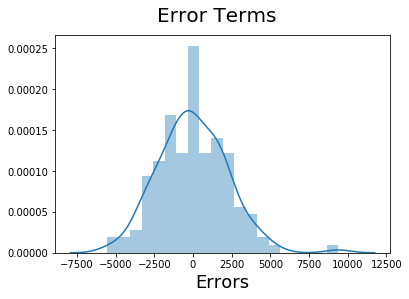

In [0]:
fig = plt.figure()
sns.distplot((y_df_final_train - y_train_final), bins = 20) 
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

### r2-score for train data

In [0]:
from sklearn.metrics import r2_score
train_score=r2_score(y_df_final_train, y_train_final)
print(round(train_score,2))

0.92


### Predicting with Test Data

In [0]:
scale_list=['symboling','wheelbase','carlength','carwidth','carheight','curbweight','cylindernumber','enginesize','boreratio',
           'stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg']

df_final_test[scale_list]=scaler.transform(df_final_test[scale_list])


In [0]:
df_final_test.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,...,porsche,renault,saab,subaru,toyota,toyouta,vokswagen,volkswagen,volvo,vw
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,...,62.000000,62.0,62.000000,62.000000,62.000000,62.0,62.000000,62.000000,62.000000,62.0
mean,0.583871,0.437764,0.559481,0.480376,0.559663,0.428470,0.229032,0.265673,0.556580,0.544314,...,0.016129,0.0,0.048387,0.016129,0.193548,0.0,0.016129,0.064516,0.080645,0.0
std,0.271724,0.212861,0.189947,0.165440,0.215811,0.179488,0.087567,0.162820,0.228484,0.160738,...,0.127000,0.0,0.216335,0.127000,0.398304,0.0,0.127000,0.247676,0.274512,0.0
min,0.000000,0.000000,0.056911,0.183333,0.141593,0.128394,0.200000,0.067925,-0.111111,-0.060606,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
25%,0.400000,0.313793,0.459350,0.358333,0.384956,0.305275,0.200000,0.177358,0.404762,0.484848,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
50%,0.600000,0.387931,0.547967,0.441667,0.588496,0.406129,0.200000,0.226415,0.563492,0.585859,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
75%,0.800000,0.570690,0.719919,0.516667,0.699115,0.564876,0.200000,0.316038,0.746032,0.641414,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
max,1.000000,1.182759,1.089431,0.975000,1.061947,0.935609,0.600000,0.932075,0.888889,0.863636,...,1.000000,0.0,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,0.0


In [0]:
y_test=df_final_test.pop('price')
X_test=df_final_test

In [0]:
X_test = sm.add_constant(X_test)
X_test_final = X_test[X_train_new_9.columns]
X_test_final.head()

,const,carlength,carwidth,curbweight,enginesize,rear,l,bmw,peugeot
160,1.0,0.409756,0.341667,0.235066,0.139623,0,0,0,0
186,1.0,0.497561,0.433333,0.305275,0.181132,0,0,0,0
59,1.0,0.596748,0.516667,0.347944,0.230189,0,0,0,0
165,1.0,0.448780,0.308333,0.301396,0.139623,0,0,0,0
140,1.0,0.263415,0.291667,0.291699,0.177358,0,0,0,0


In [0]:
y_test.head()

160    7738.0
186    8495.0
59     8845.0
165    9298.0
140    7603.0
Name: price, dtype: float64

In [0]:
y_pred = lm_10.predict(X_test_final)

Text(0, 0.5, 'y_pred')

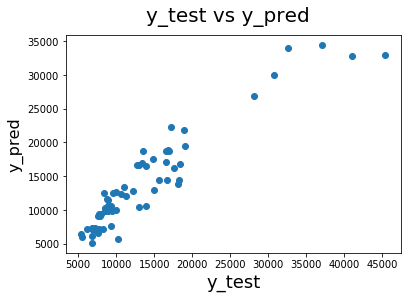

In [0]:
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

#### Note:
The inverse relation of test and predicted data at higher ends is noteworthy and can be due to very high collinearity between the parameters 

### r2 score for test data

In [0]:
from sklearn.metrics import r2_score
test_score=r2_score(y_test, y_pred)
print(round(test_score,2))


0.88


###  Final Score for test and train data :
1. train data - `0.92`
2. test  data - `0.88`

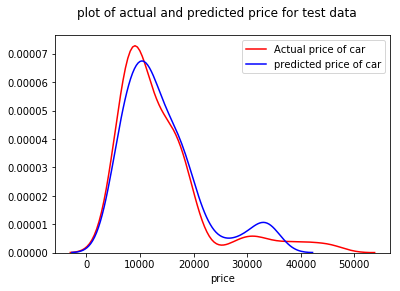

In [0]:
ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual price of car")
sns.distplot(y_pred, hist=False, color="b", label="predicted price of car" , ax=ax1)
plt.suptitle('plot of actual and predicted price for test data')
plt.show()